This notebook plots the solutions. You can actually plot the progress while the solver is running to see if it makes sense.

In [1]:
%load_ext autoreload
%autoreload 2
# add path to code
import sys, os
sys.path.insert(0, '../source')
import numpy as np
from matplotlib.tri import Triangulation
import matplotlib.pyplot as plt
from params import rho_i, rho_w, g, delta
from scipy.interpolate import griddata
from matplotlib.path import Path

In [2]:
#choose which results to load
results_name = '../results/example'

t = np.load(results_name+'/t.npy')
nodes_x = np.load(results_name+'/nodes_x.npy')
nodes_z = np.load(results_name+'/nodes_z.npy')
dofmap = np.load(results_name+'/dofmap.npy')


In [3]:
# load results and reorder dof's to the serial ordering
u = np.load(results_name+'/u.npy')
w = np.load(results_name+'/w.npy')
p = np.load(results_name+'/p.npy')
t = np.load(results_name+'/t.npy')

residual = np.load(results_name+'/residual.npy')


h = np.load(results_name+'/h.npy')
s = np.load(results_name+'/s.npy')
x = np.load(results_name+'/x.npy')

In [4]:
u.shape

(2000, 4411)

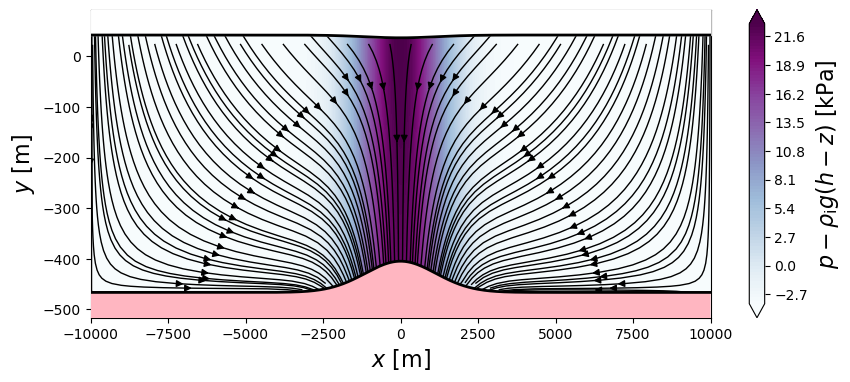

In [5]:
# timestep index for plotting 
i = -1

# ice surface
h_int = np.interp(nodes_x, x[i,:], h[i,:])

# cryostatic pressure
p_cryo = rho_i*g*(h_int-nodes_z[i,:])

# triangulation of domain
triang = Triangulation(nodes_x,nodes_z[i,:],dofmap)

# interpolation for streamplot 
xi = np.linspace(nodes_x.min(), nodes_x.max(), 200)
zi = np.linspace(nodes_z[i,:].min(), nodes_z[i,:].max(), 200)
X, Z = np.meshgrid(xi, zi)
u_interp = griddata((nodes_x, nodes_z[i,:]), u[i,:]*3.154e7, (X, Z), method='linear')
w_interp = griddata((nodes_x, nodes_z[i,:]), w[i,:]*3.154e7, (X, Z), method='linear')
max_speed = np.nanmax(np.sqrt(u_interp**2 + w_interp**2))

pad = 50
plt.figure(figsize=(10,4))
c = plt.tricontourf(triang,(p[i,:]-p_cryo)/1e3,cmap='BuPu',levels=100,extend='both')
plt.streamplot(xi, zi, u_interp/max_speed, w_interp/max_speed, color='k', linewidth=1,broken_streamlines=False)
plt.fill_between(x[i,:],s[i,:]-10*pad,y2=s[i,:],facecolor='lightpink',zorder=100)
plt.fill_between(x[i,:],h[i,:],y2=h[i,:]+10*pad,color='w',zorder=100)
plt.plot(x[i,:],h[i,:],'k-',linewidth=2,zorder=101)
plt.plot(x[i,:],s[i,:],'k-',linewidth=2,zorder=101)
plt.ylim(s.min()-pad,h.max()+pad)
plt.xlim(x.min(),x.max())
plt.xlabel(r'$x$ [m]',fontsize=16)
plt.ylabel(r'$y$ [m]',fontsize=16)
cbar = plt.colorbar(c)
cbar.ax.set_ylabel(r'$p-\rho_\mathrm{i}g(h-z)$ [kPa]',fontsize=16)
plt.show()
plt.close()

In [6]:
# xi = np.linspace(nodes_x.min(), nodes_x.max(), 500)
# zi = np.linspace(nodes_z[i,:].min(), nodes_z[i,:].max(), 500)
# X, Z = np.meshgrid(xi, zi)
# residual_interp = griddata((nodes_x, nodes_z[i,:]), residual[i,:], (X, Z), method='cubic')
# h_int = np.interp(xi, x[i,:], h[i,:])
# s_int = np.interp(xi, x[i,:], s[i,:])
# eta=1e14

In [7]:
# res = 0*xi
# dz = np.abs(zi[1]-zi[0])
# for j in range(xi.size):
#     resmask = (Z[:,j]>=s_int[j])&(Z[:,j]<=h_int[j])
#     res[j] = np.trapezoid(residual_interp[:,j][resmask],dx=dz)*(eta/(rho_i*g))

In [8]:
# plt.figure(figsize=(10,4))
# plt.subplot(121)
# plt.contourf(X,Z,(eta/(rho_i*g))*residual_interp,cmap='BuPu_r',levels=100,extend='both')
# # plt.contourf(X, Z, (Z>=s_int)&(Z<=h_int),cmap='Grays',alpha=0.1)
# plt.ylim(s.min()-pad,h.max()+pad)
# plt.xlim(x.min(),x.max())
# plt.colorbar()

# plt.subplot(122)
# plt.tricontourf(triang,(eta/(rho_i*g))*residual[i,:],cmap='BuPu_r',levels=100,extend='both')
# plt.ylim(s.min()-pad,h.max()+pad)
# plt.xlim(x.min(),x.max())
# plt.colorbar()
# plt.show()
# plt.close()

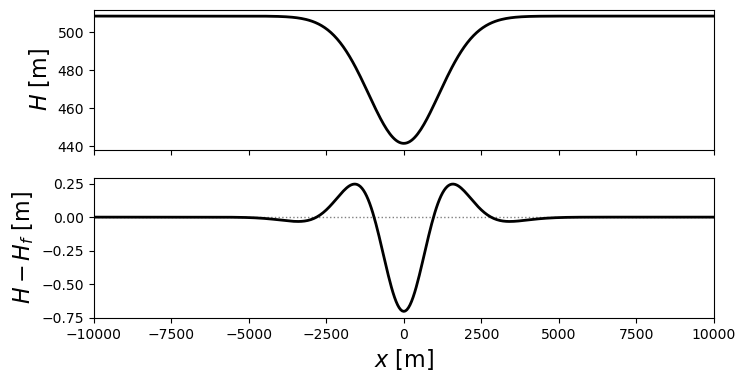

In [9]:
plt.figure(figsize=(8,4))
H = h-s
H_e = h*(1+1/delta)
plt.subplot(211)
plt.plot(x[i,:],H[i,:],'k-',linewidth=2,zorder=101)
# plt.plot(x[i,:],H_e[i,:],'--',color='deeppink',linewidth=2,zorder=101)
plt.ylabel(r'$H$ [m]',fontsize=16)
plt.xlim(x.min(),x.max())
plt.gca().set_xticklabels([])

plt.subplot(212)
R = H[i,:]-H_e[i,:]
plt.plot(x[i,:],R-R[0],'k-',linewidth=2,zorder=101)
# plt.plot(xi,res,linestyle='--',color='deeppink',linewidth=2,zorder=101)
plt.axhline(y=0,color='k',linestyle=':',linewidth=1,alpha=0.5)
plt.xlabel(r'$x$ [m]',fontsize=16)
plt.ylabel(r'$H - H_f$ [m]',fontsize=16)
plt.xlim(x.min(),x.max())
plt.show()
plt.close()


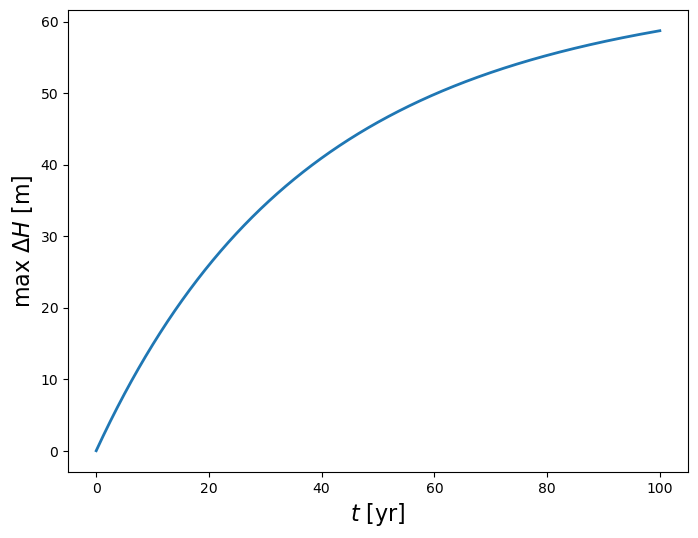

In [10]:
delta_H = np.max(np.abs(H-H[0,0]),axis=1)

plt.figure(figsize=(8,6))
plt.plot(t/3.154e7,delta_H,linewidth=2)
plt.xlabel(r'$t$ [yr]',fontsize=16)
plt.ylabel(r'max $\Delta H$ [m]',fontsize=16)
plt.show()
plt.close()